Figure(864x720)
AxesSubplot(0.125,0.536818;0.775x0.343182)
ccf for interferogram
[-0.00023883 -0.00018589 -0.00019724 ...,  0.00027404  0.00038932
  0.00052071]
[[False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]
 ..., 
 [False False False ..., False False False]
 [False False False ..., False False False]
 [False False False ..., False False False]]
[[ 0.        0.009017  0.021892 ...,  0.524996  0.539423  0.554187]
 [ 0.009017  0.        0.006705 ...,  0.500361  0.514527  0.528455]
 [ 0.021892  0.006705  0.       ...,  0.493118  0.508041  0.521356]
 ..., 
 [ 0.524996  0.500361  0.493118 ...,  0.        0.002736  0.004986]
 [ 0.539423  0.514527  0.508041 ...,  0.002736  0.        0.002635]
 [ 0.554187  0.528455  0.521356 ...,  0.004986  0.002635  0.      ]]


/home/yatesal/covseisnet_ASY/cluster_ccfs.py:443: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  img = ax.pcolormesh(df.index, df.columns, df.values.T, vmin=-clim, vmax=clim, rasterized=True, cmap='seismic')


485
no longer doing anything
2010-01-01 2011-05-01


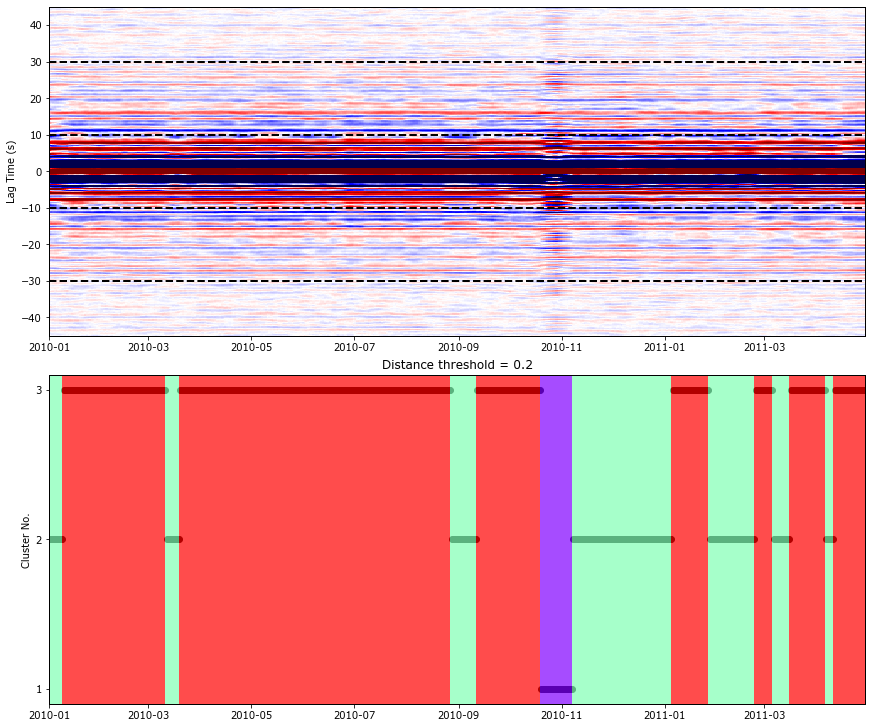

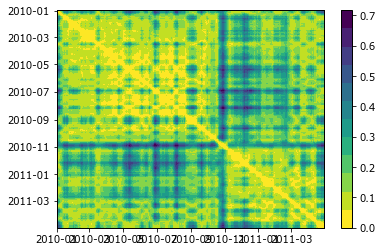

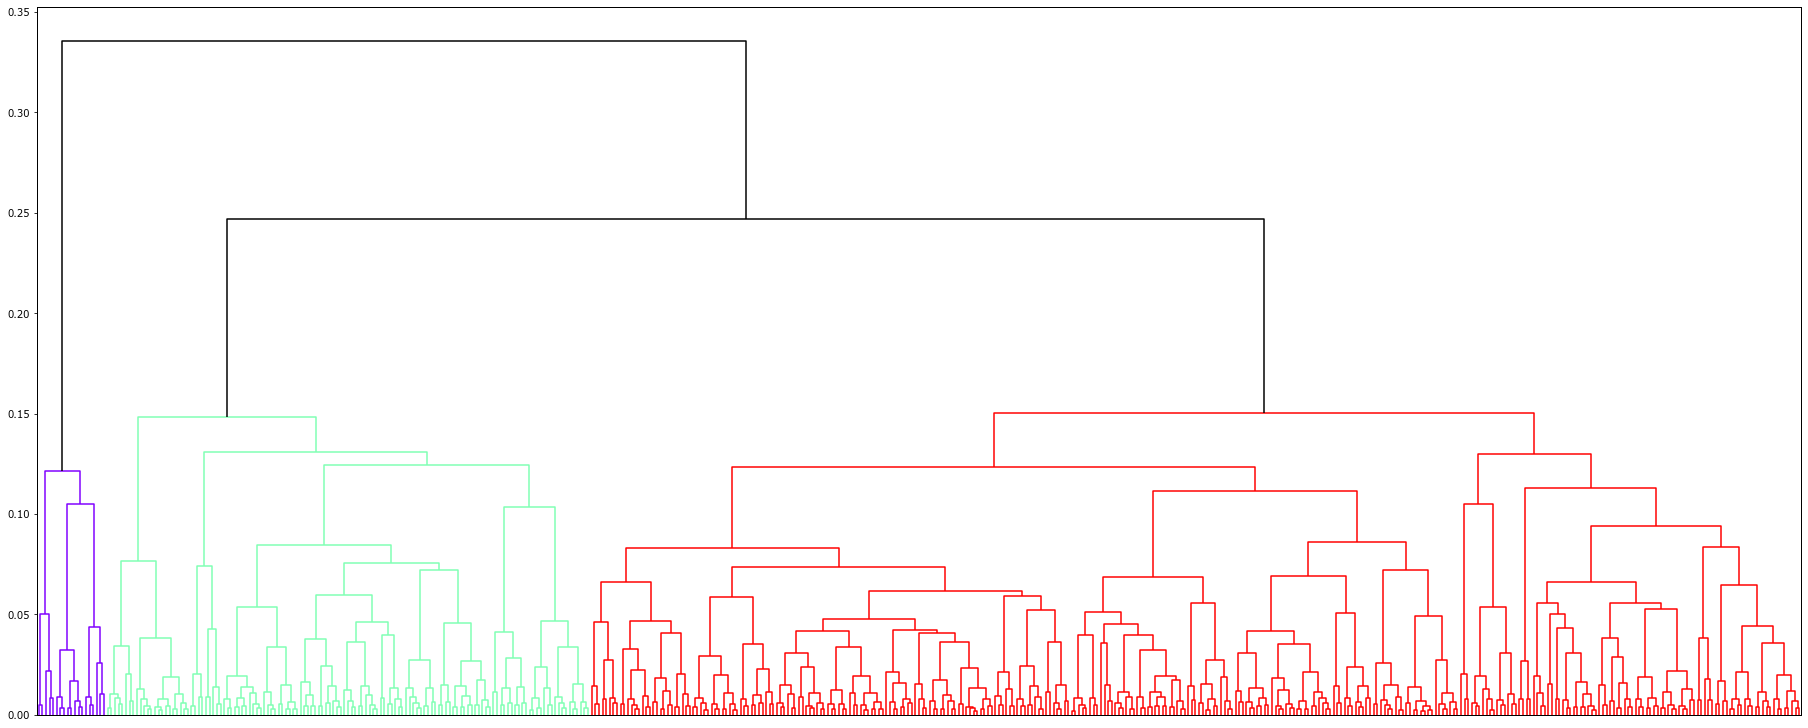

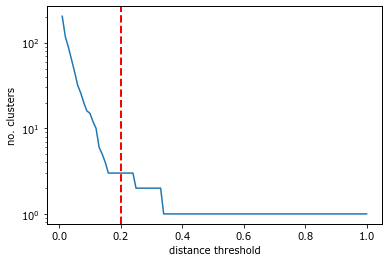

In [11]:
from cluster_ccfs import *

statpair=['UV05','UV12']
method = 'cc'
thresholds=[0.2] #distance thresholds to plot
filt='02'
frange=[0,0] #set filter low and high (if filtdata=True)
filtdata=False
norm=False #normalise CCFs
phase=False #cluster CCF instataneous phase
lagwin=[10,30] #define min and max lag time

noisedir = '/home/yatesal/msnoise/piton04' #set to directory containing 'STACK' folder of interest
network = 'YA'
loc = '00'
filt = filt
stat1 = statpair[0]
stat2 = statpair[1] #for single-station, set to same as stat1
component = 'ZZ'
stacksize = 10 #not required to match msnoise stacksize
fs = 25 #set to match CCFs
maxlag = 120 #set to match CCFs

#put into array for passing to SNR computation function
CCFparams = [noisedir, network, loc, stat1, stat2, component, stacksize, fs, maxlag]

minlagwin = lagwin[0] #minimum lag for SNR window
maxlagwin = lagwin[1] #maximum lag for SNR window

startdate='2010-01-01'
enddate='2011-05-01'
step=1

ccf_array, days = getCCFData(CCFparams, frange, startdate, enddate, step=step, filt=filt, phase=phase, filtdata=filtdata)

fig, ax = plt.subplots(len(thresholds)+1, 1, constrained_layout=True, figsize=(12,10))

#create lag time array using sampling rate and maxlag
samprate = 1.0/CCFparams[7]
maxlag = CCFparams[8]
lagtimes = np.arange(-1*maxlag, maxlag+samprate, samprate)

plot_interferogram_syn(lagtimes, ccf_array, days, fig=fig, ax=ax[0], maxlag=60)

workdir = '/home/yatesal/msnoise/piton04/'
ax[0].set_xlim(np.datetime64(days[0]), np.datetime64(days[-1]))

coda_idx = 0
ax[coda_idx].axhline(y = minlagwin, color = 'black', linewidth=2, linestyle = 'dashed')
ax[coda_idx].axhline(y = maxlagwin, color = 'black', linewidth=2, linestyle = 'dashed')
ax[coda_idx].axhline(y = minlagwin*-1, color = 'black', linewidth=2, linestyle = 'dashed')
ax[coda_idx].axhline(y = maxlagwin*-1, color = 'black', linewidth=2, linestyle = 'dashed')
ax[coda_idx].set_ylim(-1.5*maxlagwin, 1.5*maxlagwin)

#set title
stat1_full = CCFparams[1]+'.'+CCFparams[3]+'.'+CCFparams[2]
stat2_full = CCFparams[1]+'.'+CCFparams[4]+'.'+CCFparams[2]

clusterCCFs(ccf_array, days, CCFparams, frange, startdate, enddate, minlagwin, maxlagwin, cluster_method=method, step=step, norm=norm, thresholds=thresholds, fig=fig, axes=[ax[1]])

plt.show()
